What is a “nifti” file?
Each MRI scanner manufacturer (e.g., Philips, Siemens, GE) uses its own proprietary data format. To facilitate compatibility across neuroimaging software, the Neuroimaging InFormatics Technology Initiative (NIfTI) introduced a standardized format called nifti. 
Most neuroimaging tools now support nifti, making it the preferred format for data processing.

In these tutorial, you will primarily work with nifti files, also referred to as nifti images. These files typically have a .nii extension or a compressed version .nii.gz.

Additionally, we will explore how to inspect and analyze nifti images in Python. The Nibabel library provides an excellent way to read and load nifti files and convert them into numpy arrays for further analysis.

In [3]:
# Let's load some packages we need for the analysis
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib # common way of importing nibabel

In [4]:
#Load the structural dataset (T1)
mri_file = 'sub-01/anat/sub-01_T1w.nii.gz'
img = nib.load(mri_file) # here you have your data stored

In [5]:
#print the class type of the object img
print(type(img))

<class 'nibabel.nifti1.Nifti1Image'>


In [6]:
#get the 3D size of the obejct img (T1 structural image)
print(img.shape)

(240, 256, 160)


Every nifti file can be divided in three "sections":

The header with metadata;
The image data;
The affine matrix

In [7]:
#Let´s store the header in the variable hdr
hdr = img.header

In [8]:
#By using this method you can get the voxel size (and optionally the sampling rate)
hdr.get_zooms()

(np.float32(1.0), np.float32(1.0), np.float32(1.1))

In [9]:
#By using this other method, you will get the units of the measurements (here: voxel size in millimeter and time in seconds):
hdr.get_xyzt_units()

('mm', 'sec')

In [10]:
#It is now time to load the second part of the nifti file, the data!
img_data = img.get_fdata()
print(type(img_data))  # get the type of this object
print(img_data.shape) #get the size

<class 'numpy.ndarray'>
(240, 256, 160)


In [11]:
#Extract a 4x4x4 voxel patch  in the middle of the brain from the data and show the values
#Original 3D size is (240, 256, 160)
mid_vox = img_data[118:122, 126:130, 78:82]
print(mid_vox)


[[[230. 215. 319. 344.]
  [243. 238. 306. 348.]
  [240. 225. 326. 346.]
  [290. 260. 345. 267.]]

 [[264. 216. 368. 355.]
  [276. 239. 350. 323.]
  [298. 294. 358. 300.]
  [347. 361. 383. 253.]]

 [[328. 264. 354. 348.]
  [337. 301. 337. 325.]
  [345. 358. 330. 277.]
  [356. 382. 340. 228.]]

 [[372. 380. 348. 315.]
  [372. 390. 349. 339.]
  [360. 372. 332. 298.]
  [344. 351. 337. 242.]]]


In [12]:
#Extract a single slice of the 3D volume, for example, the middle slice coronal
mid_slice_x = img_data[119, :, :]
print(mid_slice_x.shape) #print the size (256, 160)

(256, 160)


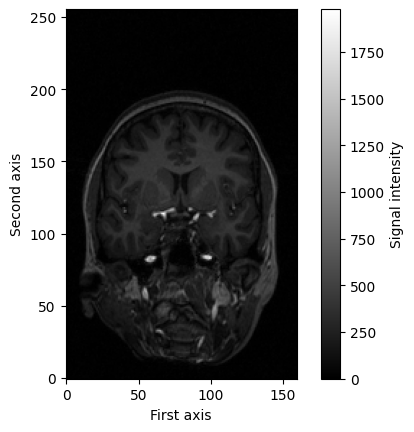

In [13]:
#We can use matplotlib to plot this slice as an image using the imshow function
plt.imshow(mid_slice_x, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [14]:
#TODO: 
#Extract a single slice of the 3D volume, for example, the middle slice axial


In [15]:
#TODO:
#Extract a single slice of the 3D volume, for example, the middle slice sagittal


In [16]:
#TODO:
#Load the functional file and print its size and the measurement units.
#Is it the same as the structural?
#What can you say about it?
#Can you tell me how long did the experiment last?
fmri_file = 'sub-01/func/sub-01_task-ft_run-1_bold.nii.gz'
f_img = nib.load(fmri_file)
print(f_img.shape)
print(f_img.header.get_zooms())
print(f_img.header.get_xyzt_units())

(64, 64, 34, 204)
(np.float32(3.0), np.float32(2.9999998), np.float32(3.3), np.float32(2.0))
('mm', 'sec')


In [17]:
#Load the second part of the functional file, the data!
f_img_data = f_img.get_fdata()
print(f_img_data.shape)

(64, 64, 34, 204)


Shape of slice: (64, 34)


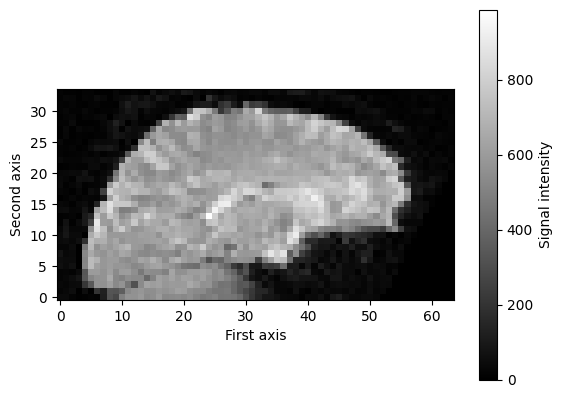

In [18]:
#Extract the slice #26 of the fifth volume (t = 10)
mid_slice_x_fmri = f_img_data[26, :, :, 5] #why 5?
print("Shape of slice: %s" % (mid_slice_x_fmri.shape,))

plt.imshow(mid_slice_x_fmri.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

Alternatively, we can analyze fMRI data through the time. Instead of focusing on spatial patterns, we can examine how the signal intensity of a single voxel changes over time. This involves extracting the time series of a specific voxel and plotting its intensity fluctuations over the course of the scan.

To begin, let’s retrieve the time series data for a particular voxel—for instance, the one located at the center of all spatial dimensions

In [19]:
mid_vox_ts = f_img_data[31, 31, 21, :]  # note the ":", saying: give me ALL the timepoints
print("Voxel timeseries shape: %s" % (mid_vox_ts.shape,))
#Why its size corresponds to 204?

Voxel timeseries shape: (204,)


In [20]:
mid_vox_ts

array([753.99571205, 722.99806135, 741.02098111, 757.0069124 ,
       734.9985804 , 729.99467393, 740.00248687, 728.00196782,
       729.02046205, 714.98295452, 738.98399264, 740.00248687,
       738.00978076, 738.00978076, 722.99806135, 716.00144876,
       707.98634194, 726.98347358, 690.98191641, 717.99415488,
       707.01213006, 707.01213006, 714.00874265, 731.01316817,
       721.00535523, 705.99363582, 710.99754229, 722.99806135,
       755.01420628, 719.01264912, 697.00431712, 709.00483618,
       712.99024841, 719.98686099, 716.00144876, 705.01942394,
       705.99363582, 721.97956711, 717.019943  , 707.01213006,
       712.01603653, 700.98972935, 709.00483618, 697.978529  ,
       717.99415488, 721.97956711, 695.011611  , 693.01890489,
       738.98399264, 707.98634194, 693.01890489, 719.01264912,
       721.00535523, 705.01942394, 710.99754229, 690.98191641,
       697.978529  , 719.01264912, 693.99311677, 700.01551747,
       731.01316817, 700.98972935, 719.98686099, 733.00

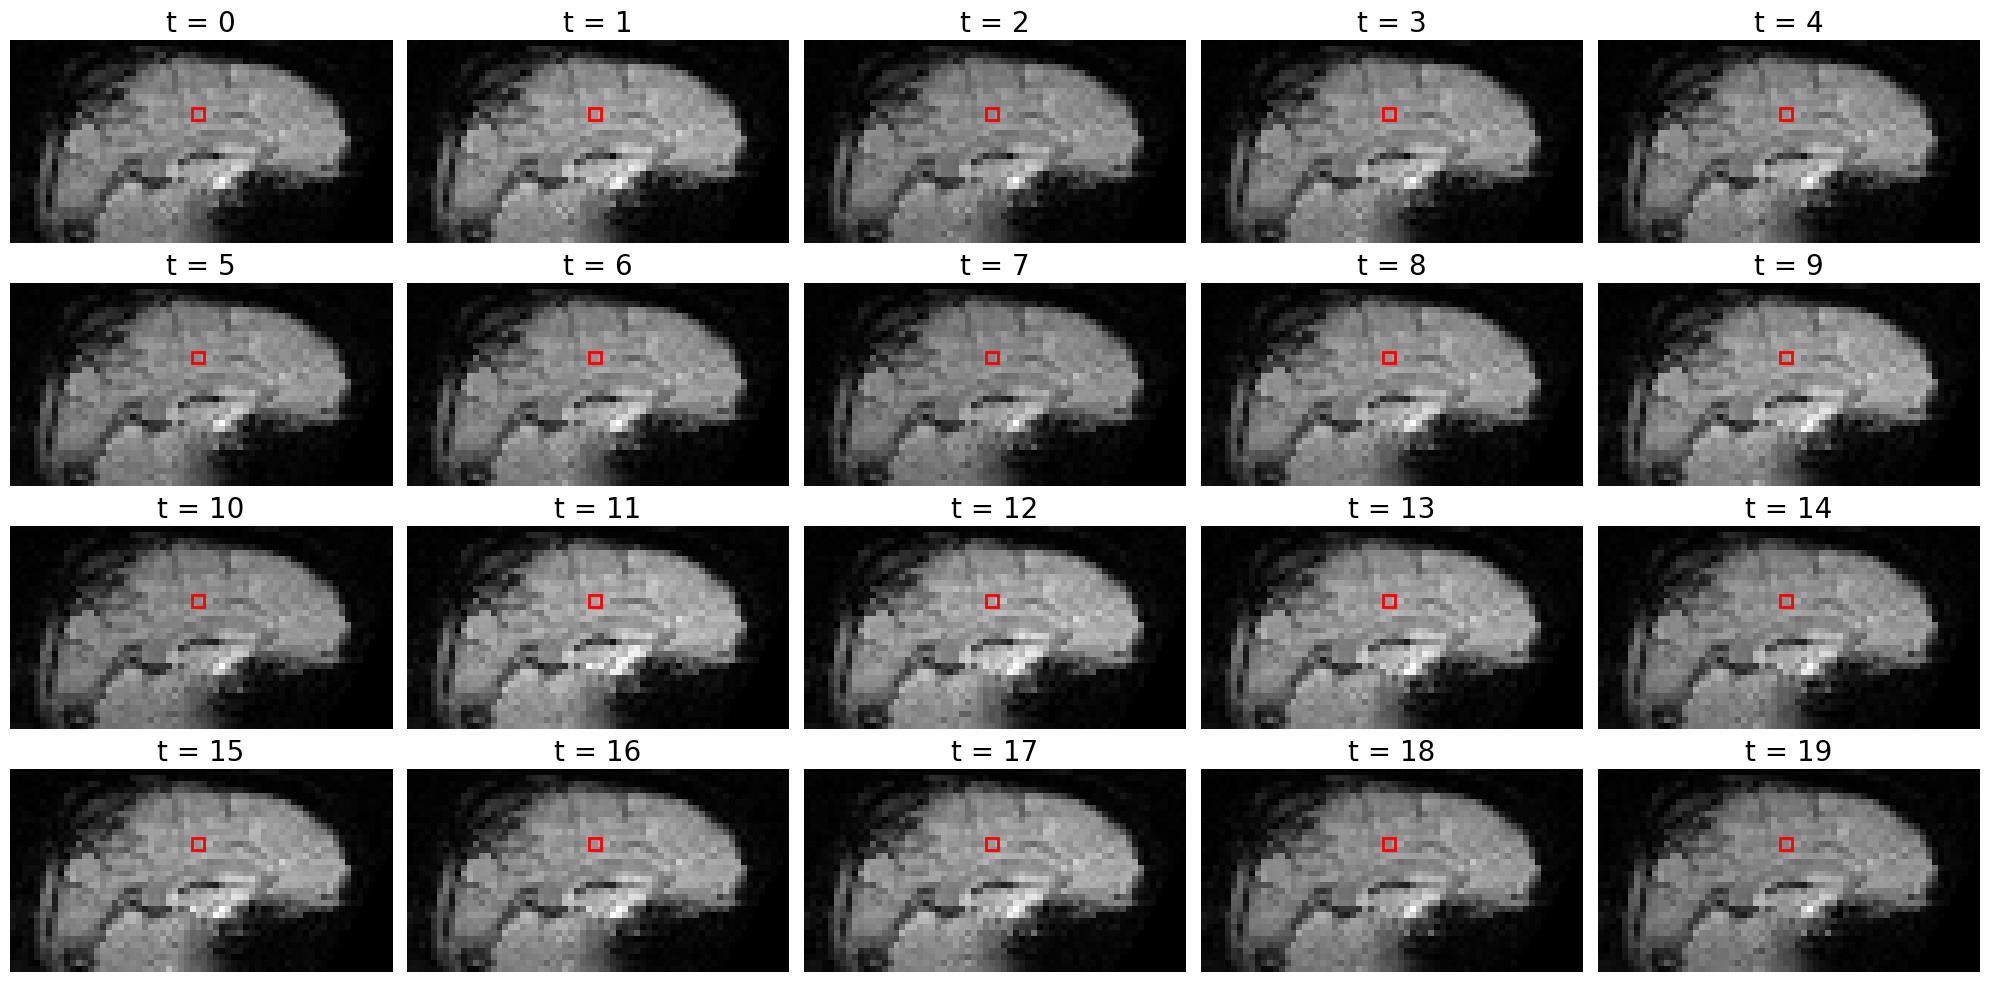

In [21]:
#Now we will show 20 timepoints (first 40 seconds of the functional experiment) of the same timeseries.
#A red box (2x2) will be drawn to show the brain location (31, 31, 21)
from matplotlib import patches

fig, axes = plt.subplots(ncols=5, nrows=4, figsize=(20, 10))  # 20 timepoints
# Loop over the first 20 volumes/timepoints
for t, ax in enumerate(axes.flatten()):    
    ax.imshow(f_img_data[31, :, :, t].T, cmap='gray', origin='lower')  # index with t!
    rect = patches.Rectangle((30, 20), 2, 2, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.axis('off')
    ax.set_title('t = %i' % t, fontsize=20)
fig.tight_layout()

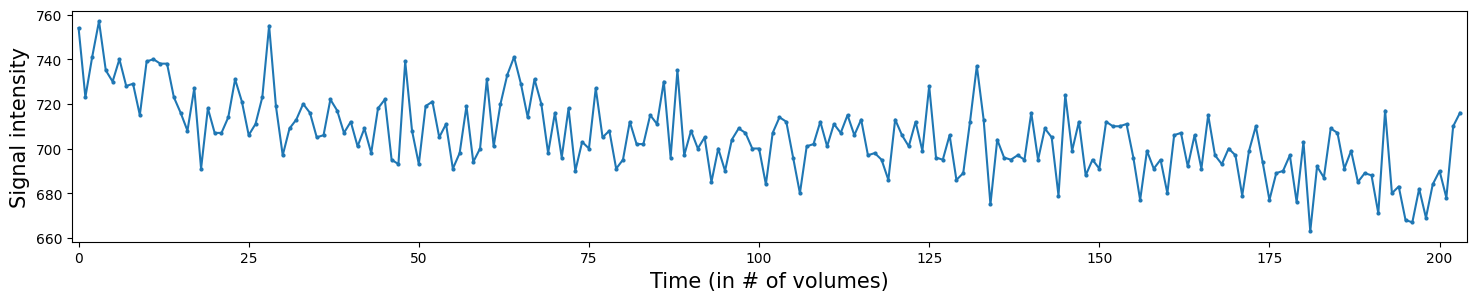

In [22]:
#Show the time course of the same voxel (mid_vox_ts). This is the BOLD signal!
plt.figure(figsize=(18, 3))
plt.plot(mid_vox_ts, 'o-', ms=2)
plt.xlim(-1, mid_vox_ts.size)
plt.ylabel('Signal intensity', fontsize=15)
plt.xlabel('Time (in # of volumes)', fontsize=15)
plt.show()

Understanding the Affine Matrix
Every nifti file contains not just the imaging data and metadata but also an affine matrix. This matrix serves as a crucial link between the voxel-based image coordinates and real-world spatial locations. If this concept seems abstract at first, let’s explore a scenario where the affine matrix plays a key role.

Imagine a colleague hands you a nifti file, but you have no prior information about its contents—it could be a brain scan, or it could be something entirely different. To get a sense of what’s inside, you decide to visualize three slices, each taken from a different axis. Specifically, you select slice 120 along the first axis (noting that Python uses zero-based indexing, so this corresponds to index 119), slice 128 from the second axis, and another slice 80 from the third axis.

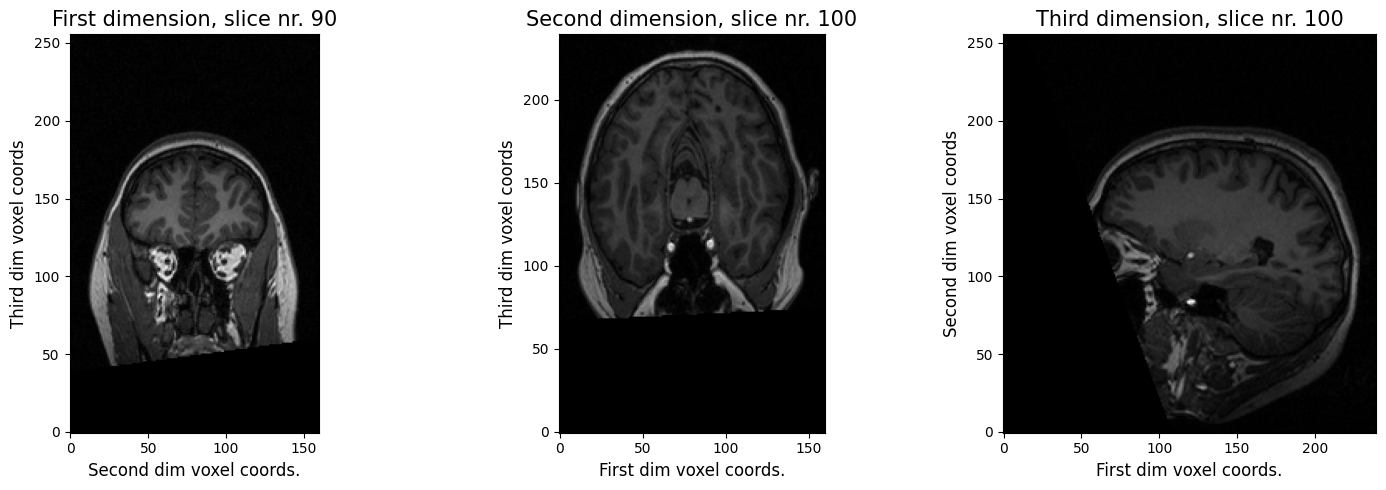

In [32]:
# the first voxel axis represents the coronal dimension (anterior ←→ posterior)
# the second voxel axis represents the represents the axial dimension (inferior ←→ superior) 
# the third one represents the sagittal dimension (left ←→ right)

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(img_data[89, :, :], origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 90', fontsize=15)

ax[1].imshow(img_data[:, 99, :], origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)

ax[2].imshow(img_data[:, :, 99].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)

fig.tight_layout()

#Problem: To accurately interpret voxel data, we need a method to determine spatial orientation—identifying left from right, as well as anterior/posterior and inferior/superior within our voxel space. This is where the affine matrix comes into play! It acts as a reference, ensuring that what we perceive as "left" in voxel space actually corresponds to "left" in real-world coordinates.

In this context, "real-world space" refers to the position of voxels in millimeters relative to the scanner’s isocenter. 
The isocenter serves as the origin of this coordinate system.

By convention, Nibabel’s Nifti1Image format assumes a specific axis orientation:

The first axis extends from left to right,
The second axis moves from posterior to anterior,
The third axis runs from inferior to superior.
This standard is often abbreviated as RAS+, meaning that positions to the Right, Anterior, and Superior of the isocenter have positive (+) coordinates, while positions to the Left, Posterior, and Inferior are assigned negative (-) values.

It turns out you only need a simple matrix operation: for a set of voxel coordinates (i,j,k) appended with a single 1, and an
 affine matrix A, you can get the real word coordinates (in RAS+) by the dot product (matrix multiplication) of A and (i,j,k,1)

In [24]:
# Our image’s affine should be a 4x4  matrix --> [x y z 1] = A[i,j,k,1]
np.set_printoptions(suppress=True, precision=3)  # suppresses scientific notation
A = img.affine
print(A)

[[   0.      -0.061    1.098  -88.25 ]
 [  -1.       0.       0.     117.821]
 [   0.       0.998    0.067 -144.45 ]
 [   0.       0.       0.       1.   ]]


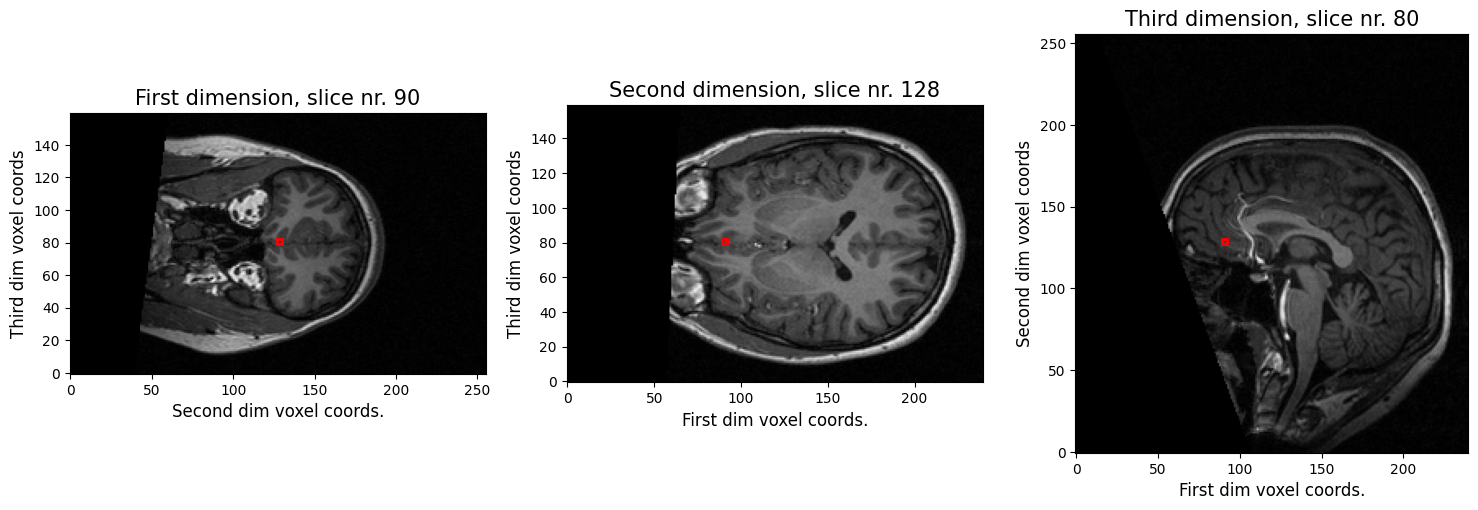

In [33]:
#Now, imagine you want to determine whether the sagittal slice shown in the leftmost plot of the previous figure 
# corresponds to the anterior or posterior side of the brain. To do this, we need to find the real-world coordinate 
# that corresponds to a given voxel coordinate (i = 89). 
# Let’s select the middle voxel index for the other two dimensions (j = 127, k = 79)

import matplotlib.patches as patches
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(img_data[89, :, :].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 90', fontsize=15)
rect = patches.Rectangle((127, 79), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)

ax[1].imshow(img_data[:, 127, :].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 128', fontsize=15)
rect = patches.Rectangle((89, 79), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[1].add_patch(rect)

ax[2].imshow(img_data[:, :, 79].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 80', fontsize=15)
rect = patches.Rectangle((89, 127), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[2].add_patch(rect)

fig.tight_layout()

In [34]:
xyz1 = A @ np.array([89, 127, 79, 1])
print(xyz1)

[ -9.266  28.821 -12.382   1.   ]


Here we see that the real world coordinate is -9.266, which means that this coordinate is 9.266 millimeters to the left (-) of the isocenter (RAS+)